In [1]:
import sys
import os
import importlib

# Ajout du chemin une fois
sys.path.append(os.path.abspath('../../../python_files'))

# Liste des noms des modules à importer et recharger
module_names = [
    'preprocessing',
    'imports',
    'files',
    'clustering',
    'profile_prediction',
    'prediction_24h'
]

# Import et reload automatique
modules = {}
for name in module_names:
    modules[name] = importlib.import_module(name)
    importlib.reload(modules[name])

# Importer tout en global namespace (équivalent à from ... import *)
for name in module_names:
    exec(f'from {name} import *')


In [2]:
Simulation_Dataset = {
    "2018": "../../../data/simulated_data_7years/Mal_isole/2018/Simulation_Outputs",
    "2019": "../../../data/simulated_data_7years/Mal_isole/2019/Simulation_Outputs",
    "2020": "../../../data/simulated_data_7years/Mal_isole/2020/Simulation_Outputs",
    "2021": "../../../data/simulated_data_7years/Mal_isole/2021/Simulation_Outputs",
    "2022": "../../../data/simulated_data_7years/Mal_isole/2022/Simulation_Outputs",
    "2023": "../../../data/simulated_data_7years/Mal_isole/2023/Simulation_Outputs",
    "2024": "../../../data/simulated_data_7years/Mal_isole/2024/Simulation_Outputs"   
}

Weather_Dataset = {
    "2018": "../../../data/simulated_data_7years/Mal_isole/2018/Weather_Dataset.txt",
    "2019": "../../../data/simulated_data_7years/Mal_isole/2019/Weather_Dataset.txt",
    "2020": "../../../data/simulated_data_7years/Mal_isole/2020/Weather_Dataset.txt",
    "2021": "../../../data/simulated_data_7years/Mal_isole/2021/Weather_Dataset.txt",
    "2022": "../../../data/simulated_data_7years/Mal_isole/2022/Weather_Dataset.txt",
    "2023": "../../../data/simulated_data_7years/Mal_isole/2023/Weather_Dataset.txt",
    "2024": "../../../data/simulated_data_7years/Mal_isole/2024/Weather_Dataset.txt"   
}


In [3]:
consommation_chauffage = extract_and_concat_consommation(Simulation_Dataset, column_index=4, prefix="consommation_heat_")

# Exemple d'utilisation
city_groups = {
    "Weather_Dataset": Weather_Dataset
   
    
}

prefix_column_map = {
    "Text_": 1,
    "Hum_": 3,
    "Wind_": 4,
    "Solar_": 5,
    "Ground_": 10
}

combined_data = extract_and_combine_all(city_groups, prefix_column_map)

Text_combined = combined_data.get('Text_combined_Weather_Dataset')
occupation=pd.read_csv("../../../data/simulated_data_7years/Mal_isole/Occup_Schedule_Youssef.txt")
occ_df = pd.DataFrame(occupation["Occupancy"].values[:8760].reshape(-1, 24))
occupation_7years = pd.concat([occ_df] * 7, ignore_index=True)

In [5]:
Text_Occ_heat_profil_7years=pd.read_csv("../../../data/simulated_data_7years/result_data/profile_prediction_valeurexact_Text_Occupation_7years_data_from_1_novembre_to_31_avril.csv")

In [6]:
Text_Occ_heat_profil_7years

,Date,0,1,2,3,4,5,6,7,8,...,17.1,18.1,19.1,20.1,21.1,22.1,23.1,heat_on,clusters_1,cluster_reel
0,2018-01-01,9.060,8.930,8.500,8.140,7.985,7.810,7.800,7.810,7.950,...,0,0,0,0,0,0,0,1,0.0,"[378.0234507871522, 450.353899304211, 517.7134..."
1,2018-01-02,9.500,9.200,8.975,8.840,8.770,8.620,8.660,8.930,9.170,...,11,0,0,0,0,0,0,1,2.0,"[746.1204532800688, 866.2501812842958, 1004.73..."
2,2018-01-03,13.715,13.685,13.870,14.490,15.240,15.570,15.760,15.765,15.485,...,15,0,0,0,0,0,0,1,0.0,"[378.0234507871522, 450.353899304211, 517.7134..."
3,2018-01-04,13.885,14.855,15.375,15.390,15.465,15.500,15.530,15.540,15.495,...,13,0,0,0,0,0,0,1,0.0,"[378.0234507871522, 450.353899304211, 517.7134..."
4,2018-01-05,12.245,12.035,11.640,11.025,10.375,9.815,9.370,9.015,8.880,...,17,0,0,0,0,0,0,1,0.0,"[378.0234507871522, 450.353899304211, 517.7134..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,2024-12-25,6.590,6.480,6.280,6.235,6.215,6.090,5.925,5.740,5.530,...,11,0,0,0,0,0,0,1,2.0,"[746.1204532800688, 866.2501812842958, 1004.73..."
1263,2024-12-26,3.025,2.570,2.105,1.640,1.165,0.835,0.600,0.355,0.255,...,15,0,0,0,0,0,0,1,2.0,"[746.1204532800688, 866.2501812842958, 1004.73..."
1264,2024-12-27,1.180,0.855,0.530,0.130,-0.230,-0.565,-0.910,-1.245,-1.405,...,0,0,0,0,0,0,0,1,0.0,"[378.0234507871522, 450.353899304211, 517.7134..."
1265,2024-12-28,1.145,0.350,-0.360,-0.480,-0.235,-0.165,-0.150,-0.035,0.020,...,0,0,0,0,0,0,0,1,0.0,"[378.0234507871522, 450.353899304211, 517.7134..."


In [7]:
start_date = "2018-01-01"
dates = pd.date_range(start=start_date, periods=len(consommation_chauffage), freq="D") 
consommation_chauffage.insert(0, "Date", dates)

add_heating_season(consommation_chauffage)

df_conso = consommation_chauffage[consommation_chauffage["heat"] == 1].copy().reset_index(drop=True)

In [8]:
df2=pd.concat([Text_Occ_heat_profil_7years.iloc[:, :],df_conso.iloc[:, 1:-1]],axis=1).reset_index(drop=True)


In [9]:
pd.set_option('display.max_columns', None)
df2

,Date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,12.1,13.1,14.1,15.1,16.1,17.1,18.1,19.1,20.1,21.1,22.1,23.1,heat_on,clusters_1,cluster_reel,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,2018-01-01,9.060,8.930,8.500,8.140,7.985,7.810,7.800,7.810,7.950,8.760,10.415,12.350,13.595,14.290,14.290,12.995,11.430,10.350,9.955,10.115,10.080,9.875,9.740,9.695,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,"[378.0234507871522, 450.353899304211, 517.7134...",0.000000,1190.005593,1312.271393,1424.724691,1527.396881,1603.485177,1671.400352,1740.431185,1790.605077,1216.560286,226.912976,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.185169,218.400559,366.664243,508.643111,651.904957,778.040225,888.554598
1,2018-01-02,9.500,9.200,8.975,8.840,8.770,8.620,8.660,8.930,9.170,9.260,9.500,10.340,11.485,12.410,12.905,13.140,13.225,13.055,12.945,13.215,13.515,13.560,13.555,13.675,0,0,0,0,0,0,0,0,5,8,10,12,8,5,9,13,15,11,0,0,0,0,0,0,1,2.0,"[746.1204532800688, 866.2501812842958, 1004.73...",1005.550681,1127.766292,1233.641357,1321.408494,1399.670350,1458.886127,1515.122264,2979.323792,3739.414021,4207.830294,4527.073522,3052.885085,1991.543052,2360.169569,2598.656000,2691.564487,2038.984677,588.746369,707.130692,750.194288,778.108310,824.081084,868.599998,893.925703
2,2018-01-03,13.715,13.685,13.870,14.490,15.240,15.570,15.760,15.765,15.485,15.330,15.450,15.780,16.045,16.045,15.995,15.965,15.585,14.830,14.145,13.705,13.270,12.950,12.925,13.190,0,0,0,0,0,0,0,0,6,10,15,17,14,12,17,20,20,15,0,0,0,0,0,0,1,0.0,"[378.0234507871522, 450.353899304211, 517.7134...",924.436733,958.702252,968.290817,932.483420,874.717413,830.205371,817.575266,1055.464998,1289.844568,1546.259325,1258.696731,424.310974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2018-01-04,13.885,14.855,15.375,15.390,15.465,15.500,15.530,15.540,15.495,15.550,15.670,16.095,16.830,17.575,17.960,17.720,17.085,15.990,14.390,13.095,12.725,13.040,12.810,12.335,0,0,0,0,0,0,0,0,3,7,9,14,10,6,9,12,16,13,0,0,0,0,0,0,1,0.0,"[378.0234507871522, 450.353899304211, 517.7134...",19.168216,0.000000,18.951647,63.175139,123.523419,159.426268,209.111482,399.231083,621.905997,493.535690,152.600028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2018-01-05,12.245,12.035,11.640,11.025,10.375,9.815,9.370,9.015,8.880,9.885,11.990,14.050,15.505,16.080,15.950,15.425,14.475,13.225,12.145,11.430,10.940,10.560,10.225,9.995,0,0,0,0,0,0,0,0,3,8,12,16,12,10,12,15,20,17,0,0,0,0,0,0,1,0.0,"[378.0234507871522, 450.353899304211, 517.7134...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,470.180799,1701.089422,1853.567138,819.529849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,2024-12-25,6.590,6.480,6.280,6.235,6.215,6.090,5.925,5.740,5.530,5.370,5.360,5.505,6.120,7.320,8.645,9.515,9.775,9.115,7.860,6.700,5.365,4.310,4.000,3.610,0,0,0,0,0,0,0,0,6,11,14,18,14,10,12,14,16,11,0,0,0,0,0,0,1,2.0,"[746.1204532800688, 866.2501812842958, 1004.73...",1855.269545,1922.169284,1996.762839,2059.920494,2129.075626,2176.737754,2235.827382,4726.921360,6845.611394,8132.399160,9225.658525,6706.814919,3977.348959,3386.516544,2506.118956,2026.435471,386.106839,0.000000,0.000000,0.000000,81.345382,0.000000,212.121982,246.909885
1263,2024-12-26,3.025,2.570,2.105,1.640,1.165,0.835,0.600,0.355,0.255,0.015,0.895,3.440,6.090,8.420,10.260,11.510,11.910,10.490,7.680,5.625,4.505,3.650,2.930,1.945,0,0,0,0,0,0,0,0,5,11,13,18,15,13,17,2

In [10]:
df2['Date'] = pd.to_datetime(df2['Date'])

df2 = df2.sort_values('Date').reset_index(drop=True)

combined_rows = []

for idx, row in df2.iterrows():
    jour = row['Date']
    jour_precedent = jour - pd.Timedelta(days=1)

    prev_row = df2[df2['Date'] == jour_precedent]

    if not prev_row.empty:
        prev_row = prev_row.iloc[0]
        prev_row_renamed = prev_row.add_suffix('_j-1')
        #prev_row_renamed = prev_row_renamed.drop(['Date', 'Date_j-1'], errors='ignore')

        # Inverser l'ordre ici
        combined_row = pd.concat([prev_row_renamed.to_frame().T.reset_index(drop=True), 
                                  row.to_frame().T.reset_index(drop=True)], axis=1)

        combined_rows.append(combined_row)
    else:
        continue

df_final = pd.concat(combined_rows, ignore_index=True)
cols_to_drop = [col for col in df_final.columns if isinstance(col, str) and 'Date' in col]
df_final = df_final.drop(columns=cols_to_drop)

In [11]:
df_final.columns = make_column_names_unique(df_final.columns)


In [12]:
df_final

,0_j-1,1_j-1,2_j-1,3_j-1,4_j-1,5_j-1,6_j-1,7_j-1,8_j-1,9_j-1,10_j-1,11_j-1,12_j-1,13_j-1,14_j-1,15_j-1,16_j-1,17_j-1,18_j-1,19_j-1,20_j-1,21_j-1,22_j-1,23_j-1,0.1_j-1,1.1_j-1,2.1_j-1,3.1_j-1,4.1_j-1,5.1_j-1,6.1_j-1,7.1_j-1,8.1_j-1,9.1_j-1,10.1_j-1,11.1_j-1,12.1_j-1,13.1_j-1,14.1_j-1,15.1_j-1,16.1_j-1,17.1_j-1,18.1_j-1,19.1_j-1,20.1_j-1,21.1_j-1,22.1_j-1,23.1_j-1,heat_on_j-1,clusters_1_j-1,cluster_reel_j-1,0_j-1_2,1_j-1_2,2_j-1_2,3_j-1_2,4_j-1_2,5_j-1_2,6_j-1_2,7_j-1_2,8_j-1_2,9_j-1_2,10_j-1_2,11_j-1_2,12_j-1_2,13_j-1_2,14_j-1_2,15_j-1_2,16_j-1_2,17_j-1_2,18_j-1_2,19_j-1_2,20_j-1_2,21_j-1_2,22_j-1_2,23_j-1_2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,12.1,13.1,14.1,15.1,16.1,17.1,18.1,19.1,20.1,21.1,22.1,23.1,heat_on,clusters_1,cluster_reel,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,9.06,8.93,8.5,8.14,7.985,7.81,7.8,7.81,7.95,8.76,10.415,12.35,13.595,14.29,14.29,12.995,11.43,10.35,9.955,10.115,10.08,9.875,9.74,9.695,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,"[378.0234507871522, 450.353899304211, 517.7134...",0.0,1190.005593,1312.271393,1424.724691,1527.396881,1603.485177,1671.400352,1740.431185,1790.605077,1216.560286,226.912976,0.0,0.0,0.0,0.0,0.0,0.0,10.185169,218.400559,366.664243,508.643111,651.904957,778.040225,888.554598,9.5,9.2,8.975,8.84,8.77,8.62,8.66,8.93,9.17,9.26,9.5,10.34,11.485,12.41,12.905,13.14,13.225,13.055,12.945,13.215,13.515,13.56,13.555,13.675,0,0,0,0,0,0,0,0,5,8,10,12,8,5,9,13,15,11,0,0,0,0,0,0,1,2.0,"[746.1204532800688, 866.2501812842958, 1004.73...",1005.550681,1127.766292,1233.641357,1321.408494,1399.67035,1458.886127,1515.122264,2979.323792,3739.414021,4207.830294,4527.073522,3052.885085,1991.543052,2360.169569,2598.656,2691.564487,2038.984677,588.746369,707.130692,750.194288,778.10831,824.081084,868.599998,893.925703
1,9.5,9.2,8.975,8.84,8.77,8.62,8.66,8.93,9.17,9.26,9.5,10.34,11.485,12.41,12.905,13.14,13.225,13.055,12.945,13.215,13.515,13.56,13.555,13.675,0,0,0,0,0,0,0,0,5,8,10,12,8,5,9,13,15,11,0,0,0,0,0,0,1,2.0,"[746.1204532800688, 866.2501812842958, 1004.73...",1005.550681,1127.766292,1233.641357,1321.408494,1399.67035,1458.886127,1515.122264,2979.323792,3739.414021,4207.830294,4527.073522,3052.885085,1991.543052,2360.169569,2598.656,2691.564487,2038.984677,588.746369,707.130692,750.194288,778.10831,824.081084,868.599998,893.925703,13.715,13.685,13.87,14.49,15.24,15.57,15.76,15.765,15.485,15.33,15.45,15.78,16.045,16.045,15.995,15.965,15.585,14.83,14.145,13.705,13.27,12.95,12.925,13.19,0,0,0,0,0,0,0,0,6,10,15,17,14,12,17,20,20,15,0,0,0,0,0,0,1,0.0,"[378.0234507871522, 450.353899304211, 517.7134...",924.436733,958.702252,968.290817,932.48342,874.717413,830.205371,817.575266,1055.464998,1289.844568,1546.259325,1258.696731,424.310974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13.715,13.685,13.87,14.49,15.24,15.57,15.76,15.765,15.485,15.33,15.45,15.78,16.045,16.045,15.995,15.965,15.585,14.83,14.145,13.705,13.27,12.95,12.925,13.19,0,0,0,0,0,0,0,0,6,10,15,17,14,12,17,20,20,15,0,0,0,0,0,0,1,0.0,"[378.0234507871522, 450.353899304211, 517.7134...",924.436733,958.702252,968.290817,932.48342,874.717413,830.205371,817.575266,1055.464998,1289.844568,1546.259325,1258.696731,424.310974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.885,14.855,15.375,15.39,15.465,15.5,15.53,15.54,15.495,15.55,15.67,16.095,16.83,17.575,17.96,17.72,17.085,15.99,14.39,13.095,12.725,13.04,12.81,12.335,0,0,0,0,0,0,0,0,3,7,9,14,10,6,9,12,16,13,0,0,0,0,0,0,1,0.0,"[378.0234507871522, 450.353899304211, 517.7134...",19.168216,0.0,18.951647,63.175139,123.523419,159.426268,209.111482,399.231083,621.905997,493.53569,152.600028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.885,14.855,15.375,15.39,15.465,15.5,15.53,15.54,15.495,15.55,15.67,16.095,16.83,17.575,17.96,17.72,17.085,15.99,14.39,13.095,12.725,13.04,12.81,12.335,0,0,0,0,0,0,0,0,3,7,9,14,10,6,9,12,16,13,0,0,0,0,0,0,1,0.0,"[378.0234507871522, 450.353899304211, 517.7

In [17]:
import ast

cols = df_final.columns.tolist()

# Indexation des colonnes
text_j_1 = cols[:24] 
occ_j_1 = cols[24:48]         
cluster_reel_j_1 = cols[50]          # <--- liste [valeurs du centroïde réel]
conso_part = cols[51:75]         # colonnes 27 à 50 (24 colonnes)
text_j = cols[75:99]   
occ_j = cols[99:123]      
cluster_reel_j = cols[125]        

# Construction du tenseur d'entrée X
all_vectors = []

for i, row in df_final.iterrows():
    vectors_line = np.zeros((24, 7))  # 5 features par heure : centroïde réel, conso, temp, cluster, cluster2
    real_centroid_j_1 = ast.literal_eval(row[cluster_reel_j_1])
    real_centroid_j = ast.literal_eval(row[cluster_reel_j])  

  
    for h in range(24):
        vectors_line[h, 0] = row[text_j_1[h]]
        vectors_line[h, 1] = row[occ_j_1[h]]
        vectors_line[h, 2] = real_centroid_j_1[h]     
        vectors_line[h, 3] = row[conso_part[h]]
        vectors_line[h, 4] = row[text_j[h]]
        vectors_line[h, 5] = row[occ_j[h]]   
        vectors_line[h, 6] = real_centroid_j[h]     
       

    all_vectors.append(vectors_line)

# Conversion en tenseur numpy
X = np.stack(all_vectors)  # shape (n_samples, 24, 5)

# Extraction des labels (dernières 24 colonnes)
label_cols = df_final.columns[-24:]
y = df_final[label_cols].values  # shape (n_samples, 24)

print("Shape X:", X.shape)
print("Shape y:", y.shape)


Shape X: (1259, 24, 7)
Shape y: (1259, 24)


In [18]:
n_samples, n_timesteps, n_features = X.shape

# Aplatir X en 2D
X_2d = X.reshape(-1, n_features)  # (n_samples*24, 7)

scaler_X = MinMaxScaler()
X_2d_scaled = scaler_X.fit_transform(X_2d)

# Remettre en 3D
X_scaled = X_2d_scaled.reshape(n_samples, n_timesteps, n_features)

# Pour y, shape (n_samples, 24)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)  # normalise chaque feature (heure) entre 0 et 1

print("X_scaled shape:", X_scaled.shape)
print("y_scaled shape:", y_scaled.shape)


X_scaled shape: (1259, 24, 7)
y_scaled shape: (1259, 24)


In [19]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_scaled, y_scaled, test_size=0.2, shuffle=False
)


# Vérification des dimensions
print("Shape de X_train2 :", X_train2.shape)
print("Shape de X_test2 :", X_test2.shape)
print("Shape de y_train2 :", y_train2.shape)
print("Shape de y_test2 :", y_test2.shape)

Shape de X_train2 : (1007, 24, 7)
Shape de X_test2 : (252, 24, 7)
Shape de y_train2 : (1007, 24)
Shape de y_test2 : (252, 24)


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0696 - mae: 0.1892 - mse: 0.0696 - val_loss: 0.0395 - val_mae: 0.1377 - val_mse: 0.0395
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0273 - mae: 0.1175 - mse: 0.0273 - val_loss: 0.0231 - val_mae: 0.1025 - val_mse: 0.0231
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0200 - mae: 0.0986 - mse: 0.0200 - val_loss: 0.0200 - val_mae: 0.0947 - val_mse: 0.0200
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0175 - mae: 0.0931 - mse: 0.0175 - val_loss: 0.0166 - val_mae: 0.0912 - val_mse: 0.0166
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0153 - mae: 0.0896 - mse: 0.0153 - val_loss: 0.0153 - val_mae: 0.0882 - val_mse: 0.0153
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0159 - mae: 0.0901 - mse: 0.0159 - val_loss: 0.0141 - val_mae: 0.0831 - val_mse: 0.0141
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0146 - mae: 0.0864 - mse: 0.0146 - val

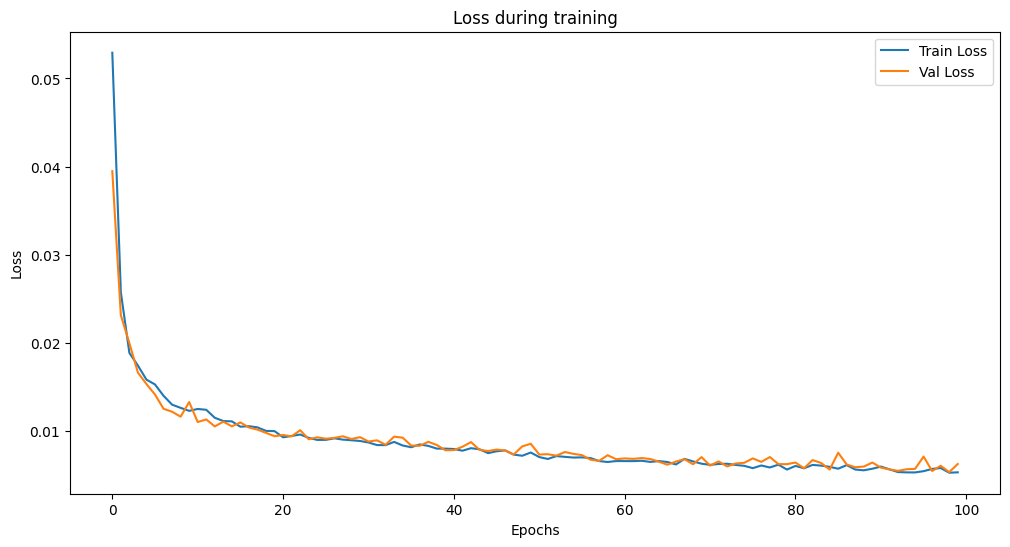

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0069 - mae: 0.0529 - mse: 0.0069
Validation Loss : 0.005342507269233465
Validation MAE: 0.04539397358894348
Validation MSE: 0.005342507269233465
Validation RMSE: 0.07309245699272576
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Test MAE: 308.9850681769908
Test MSE: 244274.31881813813
Test RMSE: 494.24115451683923
Test R²: 0.8342135487560155
Test CVRMSE: 0.45188932979400337


In [20]:
model2, history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2 = model_lstm(
    X_train2, 
    y_train2, 
    X_test2, 
    y_test2, 
    scaler_X, 
    scaler_y
)
  